In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [37]:
train_data = "C:/python/data/output/train"
val_data = "C:/python/data/output/val/"
test_data = "C:/python/data/output/test/"


batch_size = 64
img_height = 180
img_width = 180


In [5]:
import splitfolders

splitfolders.ratio('training/', output="output", seed=1337, ratio=(.7, 0.2,0.1)) 

In [38]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255 )
                                 
                                 
train_generator = train_datagen.flow_from_directory(train_data,
                                                   target_size=(img_width, img_height),
                                                   batch_size=batch_size,                                                  
                                                   shuffle=True)

Found 10144 images belonging to 3 classes.


In [39]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)
                                 
                                 
val_generator= val_datagen.flow_from_directory(val_data,
                                               target_size=(img_width, img_height),
                                               batch_size=batch_size,                                                 
                                               shuffle=True)

Found 2898 images belonging to 3 classes.


In [24]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("현재 라벨 출력 \n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : apple_fuji_L
1 : apple_fuji_M
2 : apple_fuji_S


In [6]:
num_classes = 3

model = Sequential([
  
  layers.Conv2D(64, (3,3), padding='valid', input_shape=(img_height,img_width,3),activation='relu'),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(32, (3,3), padding='valid', activation='relu'),
  layers.MaxPooling2D((2,2)),
  
  layers.Conv2D(64, (3,3), padding='valid', activation='relu'),
  layers.MaxPooling2D((2,2)),
 
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

In [8]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history_callback =model.fit(train_generator, epochs=10, validation_data=val_generator)
#callbacks=[reduce_lr]

Epoch 1/10
182/182 [==============================] - 306s 2s/step - loss: 0.5745 - accuracy: 0.7553 - val_loss: 0.3373 - val_accuracy: 0.8709
Epoch 2/10
182/182 [==============================] - 304s 2s/step - loss: 0.3646 - accuracy: 0.8602 - val_loss: 0.2488 - val_accuracy: 0.9130
Epoch 3/10
182/182 [==============================] - 302s 2s/step - loss: 0.3034 - accuracy: 0.8856 - val_loss: 0.1995 - val_accuracy: 0.9351
Epoch 4/10
182/182 [==============================] - 304s 2s/step - loss: 0.2235 - accuracy: 0.9166 - val_loss: 0.1544 - val_accuracy: 0.9413
Epoch 5/10
182/182 [==============================] - 302s 2s/step - loss: 0.1934 - accuracy: 0.9267 - val_loss: 0.2095 - val_accuracy: 0.9196
Epoch 6/10
182/182 [==============================] - 300s 2s/step - loss: 0.1427 - accuracy: 0.9458 - val_loss: 0.1020 - val_accuracy: 0.9665
Epoch 7/10
182/182 [==============================] - 303s 2s/step - loss: 0.1344 - accuracy: 0.9497 - val_loss: 0.1205 - val_accuracy: 0.9555

In [14]:
num_classes = 3

model2 = Sequential([
  
  layers.Conv2D(64, (3,3), padding='valid', input_shape=(img_height,img_width,3),activation='relu'),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(32, (3,3), padding='valid', activation='relu'),
  layers.MaxPooling2D((2,2)),
  
  layers.Conv2D(64, (3,3), padding='valid', activation='relu'),
  layers.MaxPooling2D((2,2)),
 
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(num_classes, activation='softmax')
])

In [21]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
model2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [22]:
history_callback =model2.fit(train_generator, epochs=10, validation_data=val_generator,callbacks=[reduce_lr])

Epoch 1/10
182/182 [==============================] - 298s 2s/step - loss: 0.7093 - accuracy: 0.6815 - val_loss: 0.3837 - val_accuracy: 0.8644 - lr: 0.0010
Epoch 2/10
182/182 [==============================] - 296s 2s/step - loss: 0.3711 - accuracy: 0.8574 - val_loss: 0.2147 - val_accuracy: 0.9286 - lr: 0.0010
Epoch 3/10
182/182 [==============================] - 303s 2s/step - loss: 0.2704 - accuracy: 0.8990 - val_loss: 0.1733 - val_accuracy: 0.9375 - lr: 0.0010
Epoch 4/10
182/182 [==============================] - 295s 2s/step - loss: 0.2166 - accuracy: 0.9176 - val_loss: 0.1360 - val_accuracy: 0.9551 - lr: 0.0010
Epoch 5/10
182/182 [==============================] - 295s 2s/step - loss: 0.1769 - accuracy: 0.9317 - val_loss: 0.1142 - val_accuracy: 0.9589 - lr: 0.0010
Epoch 6/10
182/182 [==============================] - 296s 2s/step - loss: 0.1661 - accuracy: 0.9395 - val_loss: 0.1475 - val_accuracy: 0.9462 - lr: 0.0010
Epoch 7/10
182/182 [==============================] - 295s 2s/st

In [12]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']



NameError: name 'learning_rate' is not defined

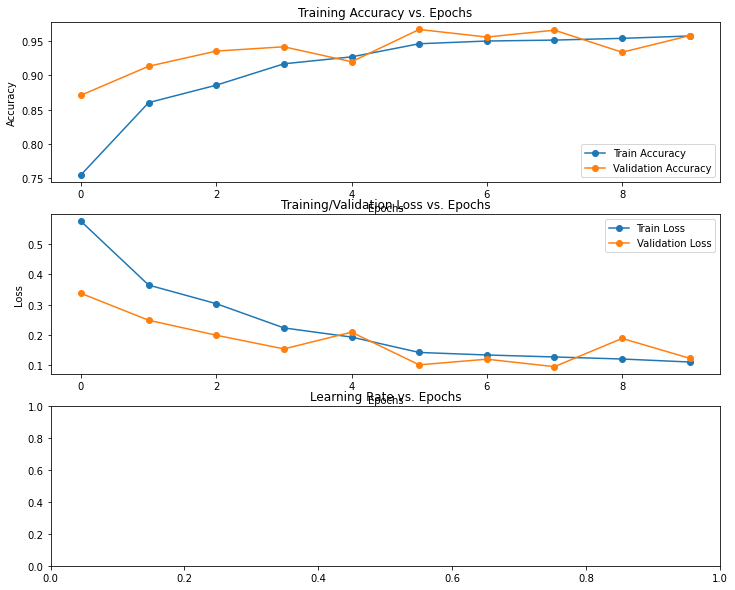

In [13]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [24]:
train_accuracy = history_callback.history['accuracy']
val_accuracy = history_callback.history['val_accuracy']

train_loss = history_callback.history['loss']
val_loss = history_callback.history['val_loss']


NameError: name 'learning_rate' is not defined

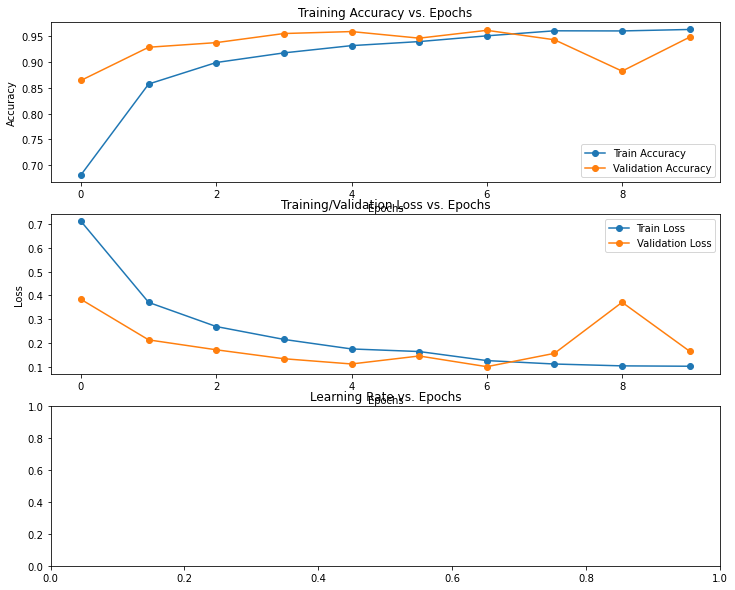

In [25]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [25]:
num_classes = 3

model3 = Sequential([
  
  layers.Conv2D(128, (3,3), padding='valid', input_shape=(img_height,img_width,3),activation='relu'),
  layers.MaxPooling2D((2,2)),

  layers.Conv2D(64, (3,3), padding='valid', activation='relu'),
  layers.MaxPooling2D((2,2)),
  
  layers.Conv2D(32, (3,3), padding='valid', activation='relu'),
  layers.MaxPooling2D((2,2)),
 
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

In [26]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 32)       0

In [27]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)
model3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [28]:
history_callback =model3.fit(train_generator, epochs=10, validation_data=val_generator,callbacks=[reduce_lr])

Epoch 1/10
159/159 [==============================] - 315s 2s/step - loss: 0.7685 - accuracy: 0.6472 - val_loss: 0.5556 - val_accuracy: 0.7654 - lr: 0.0010
Epoch 2/10
159/159 [==============================] - 249s 2s/step - loss: 0.4496 - accuracy: 0.8258 - val_loss: 0.4799 - val_accuracy: 0.8040 - lr: 0.0010
Epoch 3/10
159/159 [==============================] - 248s 2s/step - loss: 0.3254 - accuracy: 0.8810 - val_loss: 0.2811 - val_accuracy: 0.8920 - lr: 0.0010
Epoch 4/10
159/159 [==============================] - 248s 2s/step - loss: 0.2528 - accuracy: 0.9076 - val_loss: 0.2509 - val_accuracy: 0.8996 - lr: 0.0010
Epoch 5/10
159/159 [==============================] - 249s 2s/step - loss: 0.2124 - accuracy: 0.9226 - val_loss: 0.2174 - val_accuracy: 0.9172 - lr: 0.0010
Epoch 6/10
159/159 [==============================] - 254s 2s/step - loss: 0.1938 - accuracy: 0.9295 - val_loss: 0.2269 - val_accuracy: 0.9082 - lr: 0.0010
Epoch 7/10
159/159 [==============================] - 248s 2s/st

In [29]:
train_accuracy = history_callback.history['accuracy']
val_accuracy = history_callback.history['val_accuracy']

train_loss = history_callback.history['loss']
val_loss = history_callback.history['val_loss']
learning_rate = history_callback.history['lr']

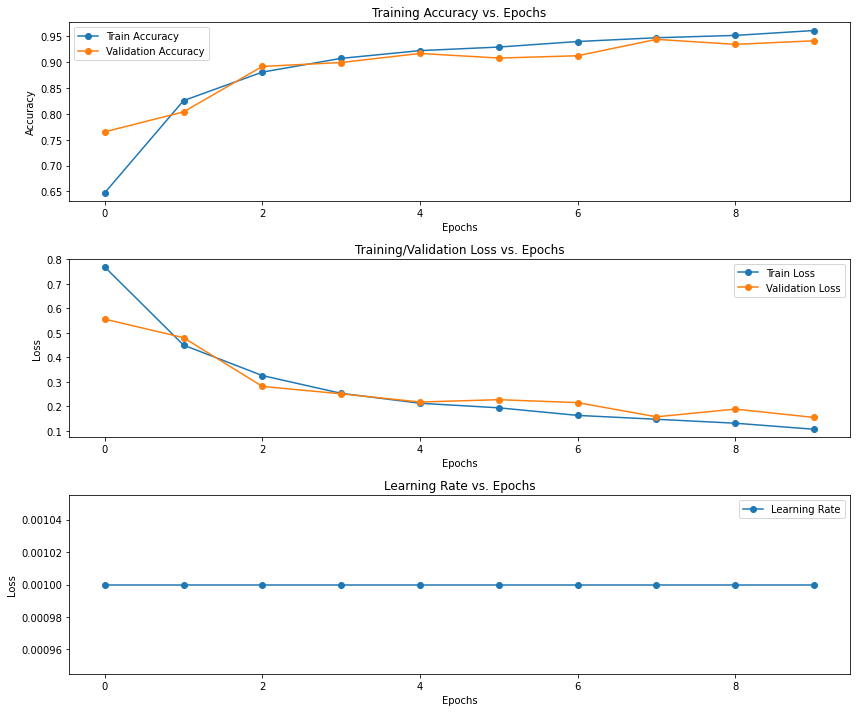

In [30]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [31]:
train_accuracy = history_callback.history['accuracy']
val_accuracy = history_callback.history['val_accuracy']

train_loss = history_callback.history['loss']
val_loss = history_callback.history['val_loss']
learning_rate = history_callback.history['lr']

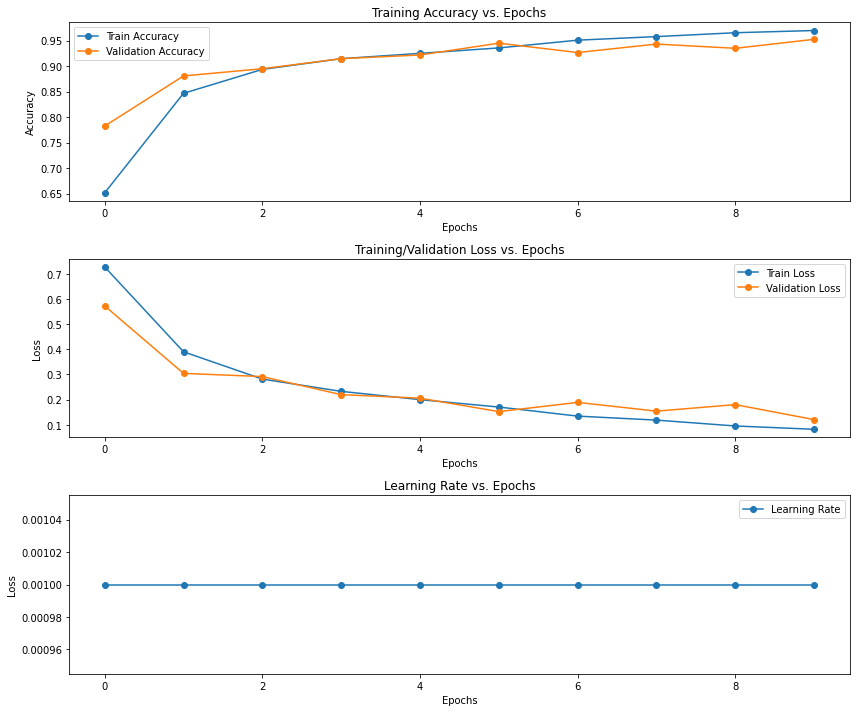

In [18]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

ax[2].set_title('Learning Rate vs. Epochs')
ax[2].plot(learning_rate, 'o-', label='Learning Rate')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Loss')
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [44]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_data,
                                                 batch_size=batch_size,
                                                 target_size = (img_height, img_width),
                                                 shuffle=True)

Found 1452 images belonging to 3 classes.


In [45]:
predictions = model3.predict(test_generator)

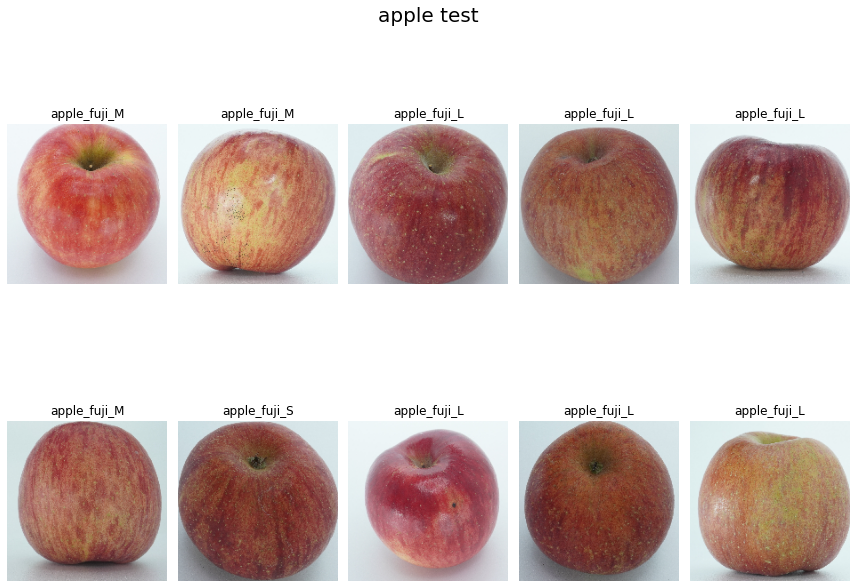

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("apple test", fontsize=20)
plt.show()

In [35]:
test_loss, test_accuracy = model3.evaluate(test_generator, batch_size=batch_size)

23/23 [==============================] - 25s 1s/step - loss: 0.1611 - accuracy: 0.9428


In [36]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     0.16107617318630219
Test Accuracy: 0.9428374767303467


In [54]:
y_pred = np.argmax(predictions, axis=1) #예측 
y_true = test_generator.classes #진짜 
print(y_pred)
print(y_true)

[1 1 0 ... 0 2 2]
[0 0 0 ... 2 2 2]


In [58]:
errors = (y_true - y_pred != 0) #errors값 얻기 true false
print(errors) 
y_pred_errors = y_pred[errors]#틀린 숫자 얻기 (0=L ,1=M, 2=S)
y_true_errors = y_true[errors]#틀린 숫자 얻기 (0=L ,1=M, 2=S)
print(y_pred_errors)
print(y_true_errors)

[ True  True False ...  True False False]
[1 1 1 2 2 2 2 1 2 2 1 1 1 2 2 1 2 1 1 1 1 2 2 1 1 2 2 1 2 2 2 2 2 2 1 1 1
 2 2 2 1 2 1 2 2 2 1 2 2 1 2 1 1 2 1 2 1 2 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2
 1 1 2 2 2 1 1 2 1 1 2 2 2 1 2 1 1 2 2 2 2 1 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1
 2 2 1 1 1 1 2 2 1 1 1 2 1 2 2 2 2 1 1 2 2 2 2 1 2 1 2 1 1 1 1 1 2 2 1 1 2
 2 2 1 2 1 2 2 2 2 1 2 1 2 2 2 1 1 1 2 2 2 1 2 1 2 2 2 2 1 1 2 1 2 2 2 2 2
 2 1 2 1 1 1 2 1 2 2 1 1 1 1 1 2 1 1 2 2 1 2 1 2 2 2 2 1 1 2 1 2 1 1 1 1 2
 2 1 2 2 1 1 2 1 1 2 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 2 2 2 2 2 1 2 1 1 2
 1 2 2 2 2 2 2 2 1 1 2 2 1 2 1 2 2 2 2 1 2 2 1 1 2 1 1 2 2 1 1 1 1 1 2 2 2
 1 2 1 1 2 1 2 2 1 2 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 1 2 1 1 2 1 2
 2 2 0 0 0 0 0 0 2 2 2 0 0 0 2 2 2 2 0 2 2 2 0 2 0 0 0 2 0 2 0 0 2 2 2 0 0
 0 2 2 2 0 0 0 2 2 0 0 2 0 2 2 0 2 0 0 0 2 0 0 0 2 0 0 2 2 0 0 2 0 0 0 0 2
 2 0 0 0 0 0 0 0 2 2 2 0 0 0 0 0 0 2 2 2 0 2 2 0 2 0 2 0 2 2 2 2 2 0 0 0 0
 2 2 2 2 2 2 2 0 0 2 0 0 2 0 2 0 2 2 2 2 2 2 0 2 2 0 0 0 0

In [59]:
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]

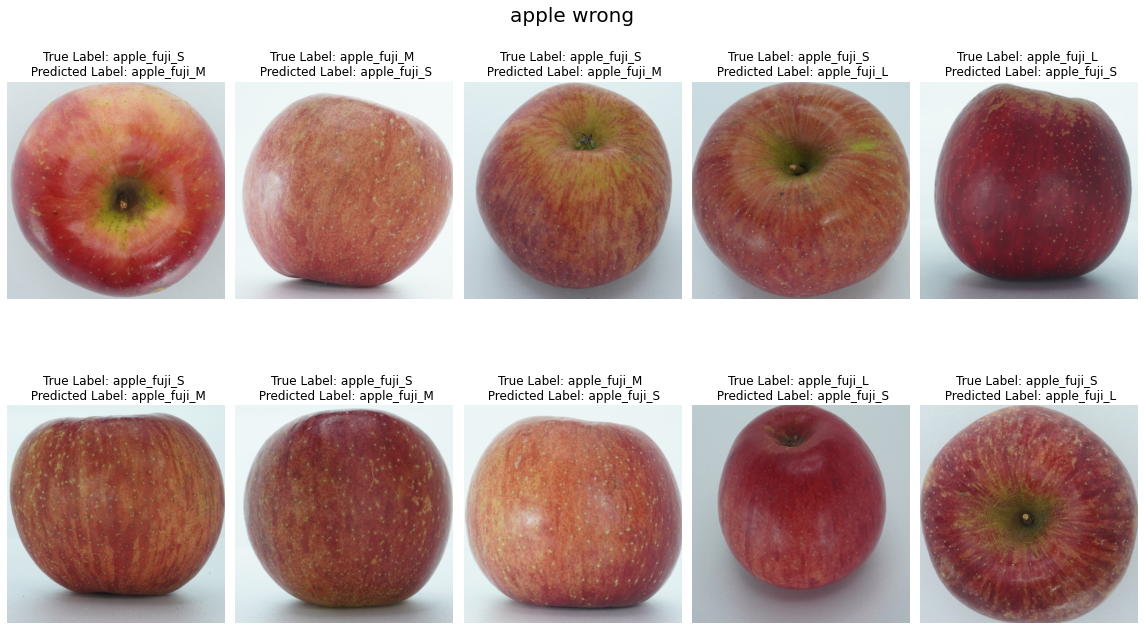

In [52]:
import cv2

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(16, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(test_data, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('apple wrong', fontsize=20)
plt.show()

In [102]:

converter = tf.lite.TFLiteConverter.from_keras_model(model3)
tflite_float_model = converter.convert()


float_model_size = len(tflite_float_model) / 1024
print('Float model size = %dKBs.' % float_model_size)

INFO:tensorflow:Assets written to: C:\Users\82103\AppData\Local\Temp\tmpsgvdrjc7\assets


INFO:tensorflow:Assets written to: C:\Users\82103\AppData\Local\Temp\tmpsgvdrjc7\assets


Float model size = 9629KBs.


In [103]:

converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()


quantized_model_size = len(tflite_quantized_model) / 1024
print('Quantized model size = %dKBs,' % quantized_model_size)
print('which is about %d%% of the float model size.'\
      % (quantized_model_size * 100 / float_model_size))

INFO:tensorflow:Assets written to: C:\Users\82103\AppData\Local\Temp\tmp047gzavp\assets


INFO:tensorflow:Assets written to: C:\Users\82103\AppData\Local\Temp\tmp047gzavp\assets


Quantized model size = 2418KBs,
which is about 25% of the float model size.


In [104]:
# 저장
f = open('model2.tflite', "wb")
f.write(tflite_quantized_model)
f.close()


In [32]:
interpreter = tf.lite.Interpreter(model_path="./ddd/apple_not_qua.tflite")

for item in interpreter.get_tensor_details():
    for key in item.keys():
        print("%s : %s" % (key, item[key]))
    print("")

name : serving_default_conv2d_input:0
index : 0
shape : [  1 150 150   3]
shape_signature : [ -1 150 150   3]
dtype : <class 'numpy.float32'>
quantization : (0.0, 0)
quantization_parameters : {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}
sparsity_parameters : {}

name : sequential/conv2d_2/Conv2D
index : 1
shape : [32]
shape_signature : [32]
dtype : <class 'numpy.float32'>
quantization : (0.0, 0)
quantization_parameters : {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}
sparsity_parameters : {}

name : sequential/conv2d_1/Conv2D
index : 2
shape : [64]
shape_signature : [64]
dtype : <class 'numpy.float32'>
quantization : (0.0, 0)
quantization_parameters : {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}
sparsity_parameters : {}

name : sequential/conv2d/Conv2D
index : 3
shape : [128]
shape_signature : [128]
dtype : <class 'nump